In [130]:
!pip install pyspark

In [1]:
from warnings import filterwarnings
filterwarnings(action='ignore')
import findspark
findspark.init('/Users/ibrahim/spark/spark-3.5.1-bin-hadoop3')

In [2]:
import pyspark
from pyspark import SparkContext

## Konfigürasyon ve Spark Bağlantısı

In [3]:
from pyspark import SparkContext
sc = SparkContext(master="local")
sc

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/19 16:54:31 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


<SparkContext master=local appName=pyspark-shell>

## Spark Versiyonu için

In [4]:
sc.version

'3.5.1'

## Kullanıcı Sorgusu için

In [5]:
sc.sparkUser()

'ibrahim'

In [6]:
dir(sc)

['PACKAGE_EXTENSIONS',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accumulatorServer',
 '_active_spark_context',
 '_assert_on_driver',
 '_batchSize',
 '_callsite',
 '_checkpointFile',
 '_conf',
 '_dictToJavaMap',
 '_do_init',
 '_encryption_enabled',
 '_ensure_initialized',
 '_gateway',
 '_getJavaStorageLevel',
 '_initialize_context',
 '_javaAccumulator',
 '_jsc',
 '_jvm',
 '_lock',
 '_next_accum_id',
 '_pickled_broadcast_vars',
 '_python_includes',
 '_repr_html_',
 '_serialize_to_jvm',
 '_temp_dir',
 '_unbatched_serializer',
 'accumulator',
 'addArchive',
 'addFile',
 'addJobTag',


## Açılan Session'ı kapatmak istersek

In [7]:
sc.stop()
#Yukarıdaki ile kapatırız.


In [8]:
import pyspark 
from pyspark.sql import SparkSession
from pyspark.conf import  SparkConf
from pyspark import SparkContext

sc = SparkContext(master = "local")
sc

<SparkContext master=local appName=pyspark-shell>

In [9]:
sc.stop() #sparkı durdurmadan yeni bir spark oluşturamazsınız

## Normal şartlarda yukarıdaki gibi Spark yapısını oluşturabiliriz fakat biz konfigüre edebilmek istersek aşağıdaki gibi yazmamız gerekir.

In [10]:
spark = (SparkSession.builder  
            .master("local") 
            .appName("pyspark for practice") 
            .getOrCreate()
)
sc = spark.sparkContext
sc
# configin normalde boş bırakılması sisteme uygun bir şekilde configlenir. istersek ram ayarları gibi ayarları yapabiliriz.

<SparkContext master=local appName=pyspark for practice>

## Temel Data Frame İşlemleri

### Alışageldiğimiz pandas data frame'leri spark tarafında uyumsuzluğa sebep olabiliyor. Bu açıdan bundan sonra spark data frameleri üzerine çalışacağız.

In [11]:
spark_df = spark.read.csv('./diabetes.csv', header=True, inferSchema=True)

## Şema Görüntülemek İstersek

In [12]:
spark_df.printSchema()

root
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: double (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Outcome: integer (nullable = true)



In [13]:
type(spark)

pyspark.sql.session.SparkSession

In [14]:
type(spark_df)

pyspark.sql.dataframe.DataFrame

## Veriyi RAM'e taşımak istersek

In [15]:
spark_df.cache() #veriyi işlenebilir bir hale getirmek olarak da düşünebiliriz

DataFrame[Pregnancies: int, Glucose: int, BloodPressure: int, SkinThickness: int, Insulin: int, BMI: double, DiabetesPedigreeFunction: double, Age: int, Outcome: int]

In [16]:
type(spark_df)

pyspark.sql.dataframe.DataFrame

## Karşılaştırmak Üzere Python DataFrame oluşturalım

In [17]:
import seaborn as sns
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include=["float64","int64"])

In [18]:
type(df)

pandas.core.frame.DataFrame

## Yukarıda da görüldüğü üzere pandas üzerinden bir data frame incelediğimizde pandas core üzerinde bir data frame olduğunu görebiliyoruz.

## İki tarafta da desteklenen bazı fonksiyonları incelemek istersek

In [19]:
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [20]:
spark_df.head()

Row(Pregnancies=6, Glucose=148, BloodPressure=72, SkinThickness=35, Insulin=0, BMI=33.6, DiabetesPedigreeFunction=0.627, Age=50, Outcome=1)

In [21]:
df.dtypes

carat    float64
depth    float64
table    float64
price      int64
x        float64
y        float64
z        float64
dtype: object

In [22]:
spark_df.dtypes

[('Pregnancies', 'int'),
 ('Glucose', 'int'),
 ('BloodPressure', 'int'),
 ('SkinThickness', 'int'),
 ('Insulin', 'int'),
 ('BMI', 'double'),
 ('DiabetesPedigreeFunction', 'double'),
 ('Age', 'int'),
 ('Outcome', 'int')]

In [23]:
df.ndim

2

In [24]:
spark_df.ndim

AttributeError: 'DataFrame' object has no attribute 'ndim'

## Görüldüğü üzere numpy üzerinden boyut bildirgesi almak için kullandığımız ndim fonksiyonunu spark'da kullanamıyoruz.

## Aynı durum size için de geçerli 

In [ ]:
spark_df.size

AttributeError: 'DataFrame' object has no attribute 'size'

## Pandas DataFrame'i paralel çalışmaz fakat PySpark DataFrame'i paralel çalışabilir. Bu açıdan büyük olarak sınıflandırılan verileri hızlıca analiz edebilme olanağı sağlar.

## Spark Tarafında Kullanabileceğimiz DataFrame İşlemleri

In [25]:
spark_df.show(2)
#yukarıdaki show fonksiyonu veriyi bir tablo şeklinde görmemizi sağlar
#gözlem sayısını belirtiriz ve 2 olarak belirttiğimiz için her sütunun 2 gözlemini göstermektedir.

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 2 rows



In [26]:
spark_df.show(12)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
|          5|    116|           74|            0|      0|25.6|                   0.201| 30|      0|
|          3|     78|           50|           32|     88|31.0|                   0.248| 26|      1|


### Verisetindeki toplam gözlem sayısını görmek istersek aşağıdaki fonksiyonu kullanabiliriz.

In [27]:
spark_df.count()

768

## Verisetindeki değişkenlerin isimlerini ulaşmak istersek.

In [28]:
spark_df.columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [29]:
len(spark_df.columns)

9

## Verisetinin özetini görmek istersek alışık olduğumuz biçimde pandas'ta describe() fonksiyonunu çağırırdık. Burada ise sonuna show eklemeliyiz.

In [30]:
spark_df.describe().show()

24/05/19 16:54:41 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|summary|       Pregnancies|          Glucose|     BloodPressure|     SkinThickness|           Insulin|               BMI|DiabetesPedigreeFunction|               Age|           Outcome|
+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|  count|               768|              768|               768|               768|               768|               768|                     768|               768|               768|
|   mean|3.8450520833333335|     120.89453125|       69.10546875|20.536458333333332| 79.79947916666667|31.992578124999977|      0.4718763020833327|33.240885416666664|0.3489583333333333|
| stddev|  3.36957806269887|31.97261819513622|19.355807170644777|15.95

## İstediğimiz bir kategorik değişken üzerinde describe kullanmak istersek

In [31]:
spark_df.describe("Pregnancies").show()

+-------+------------------+
|summary|       Pregnancies|
+-------+------------------+
|  count|               768|
|   mean|3.8450520833333335|
| stddev|  3.36957806269887|
|    min|                 0|
|    max|                17|
+-------+------------------+



## Değişken seçmek istersek

In [32]:
spark_df.select("Glucose").show(2)

+-------+
|Glucose|
+-------+
|    148|
|     85|
+-------+
only showing top 2 rows



## Pandas'ta değişken seçerken df["X"] yazarak değişken seçerdik Spark'da ise select fonksiyonunun içine belirtememiz gerekiyor

In [33]:
spark_df.select("Glucose","Pregnancies").show(2)

+-------+-----------+
|Glucose|Pregnancies|
+-------+-----------+
|    148|          6|
|     85|          1|
+-------+-----------+
only showing top 2 rows



## Eşsiz Gözlemlere ulaşmak istersek

In [34]:
spark_df.select("Glucose").distinct().count()

136

## Bir değişkenin içerisindeki birbirini tekrar eden değerleri silip görmek istersek

In [35]:
spark_df.select("Glucose").dropDuplicates().show()

+-------+
|Glucose|
+-------+
|    148|
|     85|
|    137|
|     65|
|    133|
|     78|
|    155|
|    108|
|    193|
|    115|
|    126|
|    101|
|     81|
|    183|
|     76|
|    159|
|     44|
|    103|
|     91|
|    128|
+-------+
only showing top 20 rows



In [36]:
spark_df.select("Glucose").dropDuplicates().count()
# Eşsiz değerler elimizde kaldı ve sayısını da görebiliyoruz.

136

In [37]:
spark_df.crosstab("Outcome","Pregnancies").show()

+-------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|Outcome_Pregnancies|  0|  1| 10| 11| 12| 13| 14| 15| 17|  2|  3|  4|  5|  6|  7|  8|  9|
+-------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|                  0| 73|106| 14|  4|  5|  5|  0|  0|  0| 84| 48| 45| 36| 34| 20| 16| 10|
|                  1| 38| 29| 10|  7|  4|  5|  2|  1|  1| 19| 27| 23| 21| 16| 25| 22| 18|
+-------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+



## Eksik gözlemlerden kurtulmak ve onları göstermek istersek

In [38]:
spark_df.dropna().count()
#çıktıdan da görüldüğü üzere verisetimizde eksik gözlem yokmuş

768

In [39]:
spark_df.dropna().show()
#Eğer veri setimizde eksik veriler olsaydı temizlenecekti ve gösterilecekti.

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
|          5|    116|           74|            0|      0|25.6|                   0.201| 30|      0|
|          3|     78|           50|           32|     88|31.0|                   0.248| 26|      1|


## Gözlem Seçmek ve Filtrelemek İstersek

#### Aşağıda yaşı 40'tan büyük olanları filtrelemiş olduk.

In [40]:
spark_df.filter(spark_df.Age > 40).count()

194

In [41]:
spark_df.filter(spark_df.Age > 40).show()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          2|    197|           70|           45|    543|30.5|                   0.158| 53|      1|
|          8|    125|           96|            0|      0| 0.0|                   0.232| 54|      1|
|         10|    139|           80|            0|      0|27.1|                   1.441| 57|      0|
|          1|    189|           60|           23|    846|30.1|                   0.398| 59|      1|
|          5|    166|           72|           19|    175|25.8|                   0.587| 51|      1|
|          8|     99|           84|            0|      0|35.4|                   0.388| 50|      0|


## Gruplama İşlemleri yapmak istersek

In [42]:
spark_df.groupBy("OutCome").count().show()

+-------+-----+
|OutCome|count|
+-------+-----+
|      1|  268|
|      0|  500|
+-------+-----+



## Gruplama işlemlerinin yanında kapsamlı agg işlemleri yapmak istersek aşağıdaki gibi yapabiliriz.

In [43]:
spark_df.groupBy("OutCome").agg({"BMI":"mean"}).show()
#ortalamasını aldık

+-------+-----------------+
|OutCome|         avg(BMI)|
+-------+-----------------+
|      1|35.14253731343278|
|      0|30.30419999999996|
+-------+-----------------+



In [44]:
spark_df.groupBy("OutCome").agg({"BMI":"std"}).show()
#standart sapmasını aldık

+-------+-----------------+
|OutCome|      stddev(BMI)|
+-------+-----------------+
|      1|7.262967242346374|
|      0|7.689855011650116|
+-------+-----------------+



## Değişken ekleme ve değişken silme ihtiyaçlarımızı aşağıdaki gibi karşılayabiliriz.

In [45]:
spark_df.withColumn("yeni_degisken", spark_df.BMI / 2).select("BMI","yeni_degisken").show(5)

+----+-------------+
| BMI|yeni_degisken|
+----+-------------+
|33.6|         16.8|
|26.6|         13.3|
|23.3|        11.65|
|28.1|        14.05|
|43.1|        21.55|
+----+-------------+
only showing top 5 rows



## Herhangi bir değişkenin ismini değiştirmek istersek

In [46]:
spark_df.withColumnRenamed("Outcome","bagimli_degisken").columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'bagimli_degisken']

In [47]:
spark_df.withColumnRenamed("Outcome","bagimli_degisken").show()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+----------------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|bagimli_degisken|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+----------------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|               1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|               0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|               1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|               0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|               1|
|          5|    116|           74|            0|      0|25.6|                   0.201| 30|               0|
|          3|     7

## Bir değişkeni silmek istersek

In [48]:
spark_df.show()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
|          5|    116|           74|            0|      0|25.6|                   0.201| 30|      0|
|          3|     78|           50|           32|     88|31.0|                   0.248| 26|      1|


In [49]:
spark_df.drop("Insulin").columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [50]:
spark_df.drop("Insulin").show()

+-----------+-------+-------------+-------------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+----+------------------------+---+-------+
|          6|    148|           72|           35|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|43.1|                   2.288| 33|      1|
|          5|    116|           74|            0|25.6|                   0.201| 30|      0|
|          3|     78|           50|           32|31.0|                   0.248| 26|      1|
|         10|    115|            0|            0|35.3|                   0.134| 

## Spark tarafındaki veri yapısını pandasa çevirmek istersek toPandas() fonksiyonunu kullanabiliriz.

In [51]:
spark_df.groupBy("Outcome").count().toPandas()

,Outcome,count
0,1,268
1,0,500


In [52]:
a = spark_df.groupBy("Outcome").count().toPandas()

In [53]:
a

,Outcome,count
0,1,268
1,0,500


In [54]:
a.shape

(2, 2)

In [55]:
a.iloc[0:1,0:1]

,Outcome
0,1


# SQL İşlemleri

## Spark üzerinde sql sorgularını gerçekleştirelim

In [56]:
spark_df.registerTempTable("table_df")

In [57]:
spark.sql("Show Databases").show()

+---------+
|namespace|
+---------+
|  default|
+---------+



In [58]:
spark.sql("Show tables").show()

+---------+---------+-----------+
|namespace|tableName|isTemporary|
+---------+---------+-----------+
|         | table_df|       true|
+---------+---------+-----------+



In [59]:
spark.sql("Select Glucose from table_df").show()

+-------+
|Glucose|
+-------+
|    148|
|     85|
|    183|
|     89|
|    137|
|    116|
|     78|
|    115|
|    197|
|    125|
|    110|
|    168|
|    139|
|    189|
|    166|
|    100|
|    118|
|    107|
|    103|
|    115|
+-------+
only showing top 20 rows



In [60]:
spark.sql("Select Outcome, mean(Glucose) from table_df group by Outcome").show()

+-------+------------------+
|Outcome|     mean(Glucose)|
+-------+------------------+
|      1|141.25746268656715|
|      0|            109.98|
+-------+------------------+



# Büyük Veri İçin Görselleştirme Aşamaları

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

24/05/19 16:54:49 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


## Genel olarak görselleştirmeden önce veriyi SPARK tarafında bir indirgeyeceğiz ondan sonra indirgenmiş veri küçük yapıda olacağından toPandas() fonksiyonu ile pandasa çevireceğiz sonrasında ise görselleştirme aşamasına geçiş yapacağız.

In [62]:
sdf = spark_df.toPandas()
sdf

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


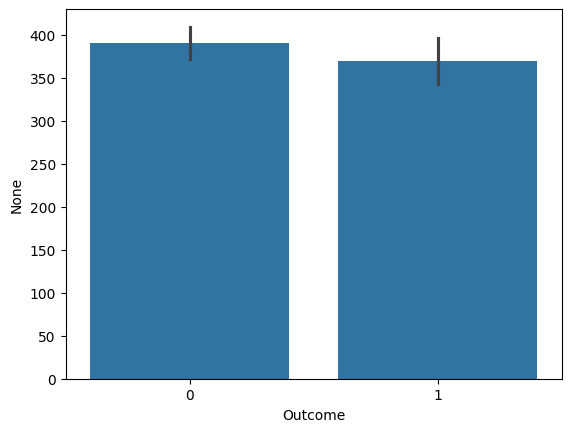

In [64]:
sns.barplot(x= "Outcome", y = sdf.Outcome.index, data = sdf);